    Total Fertility Rate  Adolescent fertility rate  Literacy rate  \
0                    1.7                       13.0          66.40   
1                    1.3                        3.0          86.27   
2                    1.8                        6.0          66.95   
3                    1.9                       12.0          85.90   
4                    3.0                       11.0          70.90   
5                    1.4                        0.8          86.43   
6                    1.8                        3.1          77.30   
7                    1.8                        4.3          87.07   
8                    1.6                        3.3          88.70   
9                    1.3                        2.7          87.40   
10                   1.9                        5.2          82.40   
11                   1.9                        3.9          80.40   
12                   1.7                        3.4          86.60   
13                  

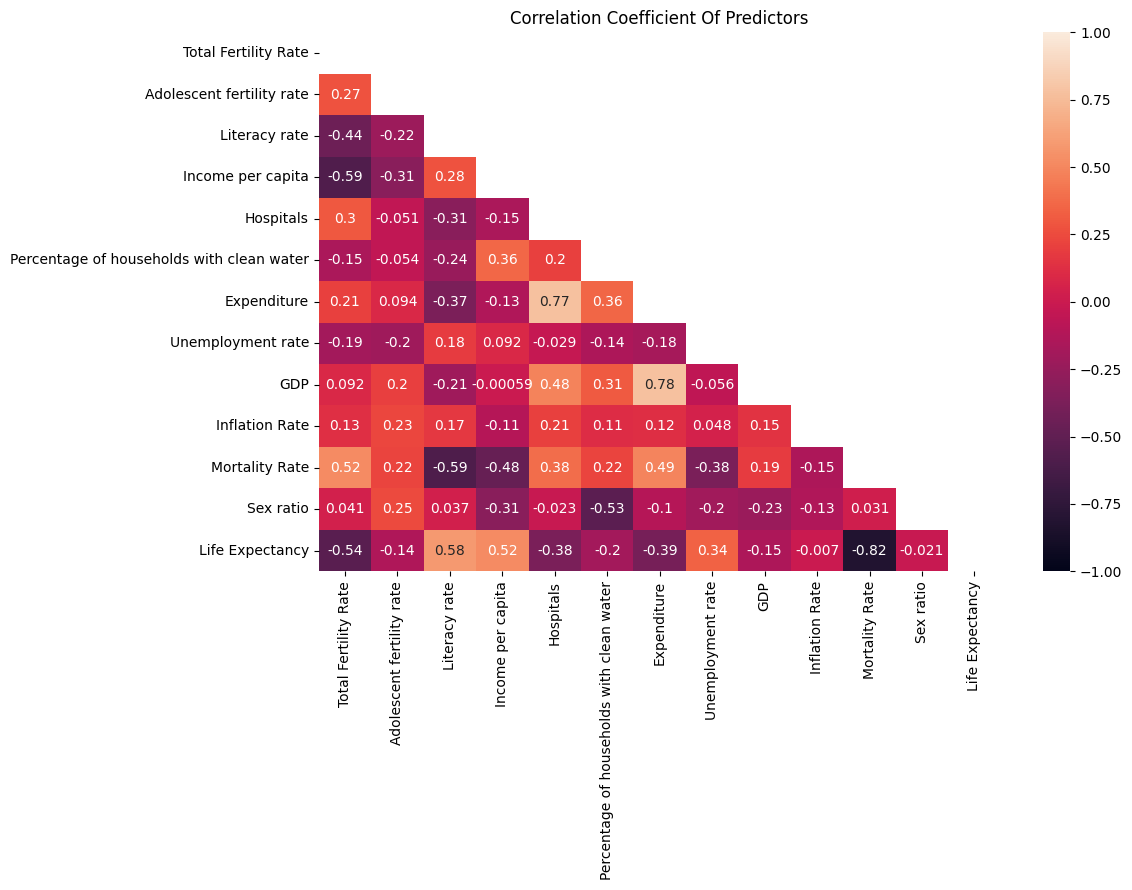

                                     Variable       VIF
6                                 Expenditure  8.071556
8                                         GDP  3.960580
4                                   Hospitals  3.528716
10                             Mortality Rate  3.435827
5   Percentage of households with clean water  2.438705
3                           Income per capita  2.382022
0                        Total Fertility Rate  2.273590
11                                  Sex ratio  2.005910
2                               Literacy rate  1.875849
1                   Adolescent fertility rate  1.662254
9                              Inflation Rate  1.631896
7                           Unemployment rate  1.403925


In [ ]:
 # import pandas pandas
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv('DS - Project.csv')

TLayerName = df.columns.tolist()
TLayerName = TLayerName[1:14]

print(df)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[TLayerName] = scaler.fit_transform(df[TLayerName])

# describe dataset
df.info()
print(df)

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(11,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# compute the vif for all given features
def compute_vif(considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = ['Total Fertility Rate','Adolescent fertility rate','Literacy rate','Income per capita','Hospitals', 'Percentage of households with clean water','Expenditure', 'Unemployment rate','GDP','Inflation Rate','Mortality Rate','Sex ratio']


# compute vif
vif = compute_vif(considered_features).sort_values('VIF', ascending=False)
print (vif)

In [ ]:
considered_features.remove('Hospital beds')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-32-1adb75053993>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,Expenditure,8.071556
8,GDP,3.960580
4,Hospitals,3.528716
10,Mortality Rate,3.435827
5,Percentage of households with clean water,2.438705
3,Income per capita,2.382022
0,Total Fertility Rate,2.273590
11,Sex ratio,2.005910
2,Literacy rate,1.875849
1,Adolescent fertility rate,1.662254


    Total Fertility Rate  Adolescent fertility rate  Literacy rate  \
0                    1.7                       13.0          66.40   
1                    1.3                        3.0          86.27   
2                    1.8                        6.0          66.95   
3                    1.9                       12.0          85.90   
4                    3.0                       11.0          70.90   
5                    1.4                        0.8          86.43   
6                    1.8                        3.1          77.30   
7                    1.8                        4.3          87.07   
8                    1.6                        3.3          88.70   
9                    1.3                        2.7          87.40   
10                   1.9                        5.2          82.40   
11                   1.9                        3.9          80.40   
12                   1.7                        3.4          86.60   
13                  

<Axes: >

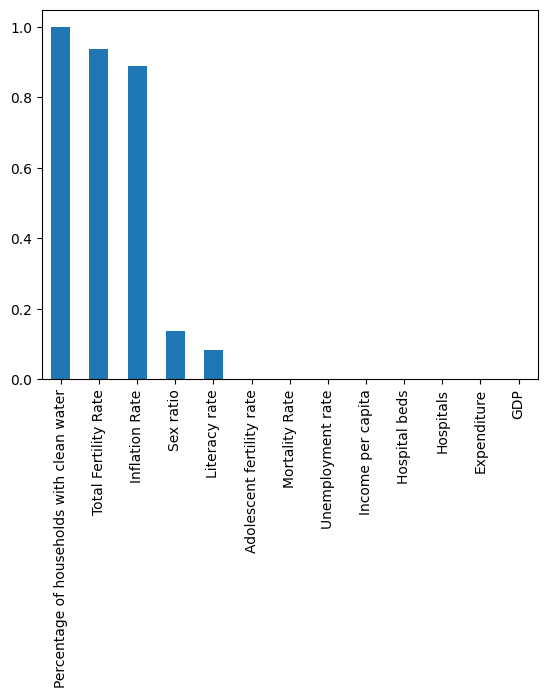

In [ ]:
#Chi-square
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
churn_df = pd.read_csv('DS - Project.csv')
y = abs(churn_df['Life Expectancy'])
#TLayerName = churn_df.columns.tolist()
#TLayerName = TLayerName[0:16]
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#churn_df[TLayerName] = scaler.fit_transform(churn_df[TLayerName])
#churn_df.head()
from sklearn.feature_selection import chi2
X = abs(churn_df.drop('Life Expectancy',axis=1))
print(X,y)
#y=y.astype('int')
chi_scores = chi2(X,y)
chi_scores
p_values = pd.Series(chi_scores[1],index = X.columns)
print(p_values)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
churn_df = pd.read_csv('DS - Project.csv')

X= pd.DataFrame(churn_df.iloc[:,:-1])
y= pd.DataFrame(churn_df.iloc[:,-1])
#y = abs(churn_df['Life Expectancy'])
#X = abs(churn_df.drop('Life Expectancy',axis=1))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
regressor=LinearRegression()
regressor.fit(X_train, y_train)
v=pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w=pd.DataFrame(X.columns,columns=['Attribute'])
coeff_df=pd.concat([w,v],axis=1,join='inner')

y_pred=regressor.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted'])
coeff_df

,Attribute,Co-efficient
0,Adolescent fertility rate,1.397895e-02
1,Income per capita,2.175290e-06
2,Hospitals,-2.669105e-05
3,Expenditure,1.413398e-05
4,Unemployment rate,-3.337323e-03
5,GDP,-2.293381e-07
6,Mortality Rate,-9.693517e-02


In [ ]:
#Simple Linear Regression With scikit-learn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
churn_df = pd.read_csv('DS.csv')

x = pd.DataFrame(churn_df.iloc[:,:-1])
y = pd.DataFrame(churn_df.iloc[:,-1])

#x, y = np.array(x), np.array(y)

model = LinearRegression()

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

new_model = LinearRegression().fit(x, y.values.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

#y_pred = model.intercept_ + model.coef_ * x
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
# y_pred = np.append(model.intercept_,model.coef_)
# y_pred = ((y_pred*x).reshape(-1,1))
print(f"predicted response:\n{y_pred}")


coefficient of determination: 0.7872407046317821
intercept: [73.54220669]
slope: [[-3.66474320e-01  6.37584688e-02  4.65829772e-02  4.56118749e-06
   2.70150887e-05 -3.52719277e-04 -1.08447517e+00 -2.95794733e-05
   1.02599250e-02 -9.76920087e-07 -9.75930495e-02 -1.10005213e-01
  -3.30654584e-03]]
intercept: [73.54220669]
slope: [[-3.66474320e-01  6.37584688e-02  4.65829772e-02  4.56118749e-06
   2.70150887e-05 -3.52719277e-04 -1.08447517e+00 -2.95794733e-05
   1.02599250e-02 -9.76920087e-07 -9.75930495e-02 -1.10005213e-01
  -3.30654584e-03]]
predicted response:
[[70.86691743]
 [73.60119662]
 [70.99978758]
 [69.36307085]
 [68.22627993]
 [73.4898565 ]
 [68.6718735 ]
 [72.168816  ]
 [74.21563764]
 [75.36469003]
 [70.70298939]
 [70.04001827]
 [71.71100796]
 [70.95041895]
 [70.1569591 ]
 [73.16307382]
 [75.49973191]
 [73.00863644]
 [68.21728399]
 [73.27905892]
 [72.95255872]
 [69.74428592]
 [73.46934982]
 [74.72380294]
 [68.4757068 ]
 [73.63578934]
 [71.40594212]
 [67.95543122]
 [74.006526

<Axes: title={'center': 'Total Fertility Rate'}, xlabel='Life Expectancy'>

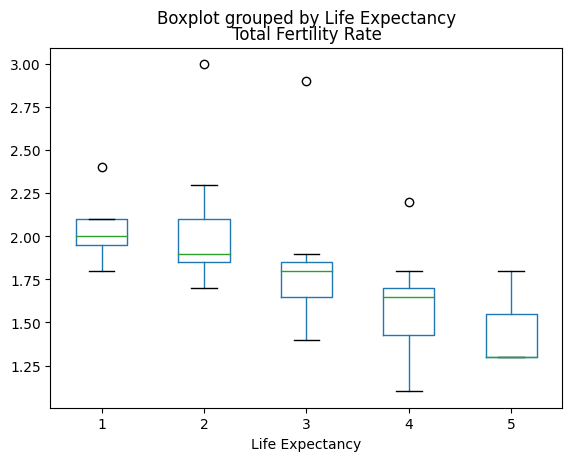

In [ ]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv("DS - Project.csv")

# display 5 rows of dataset
df.head()

df.boxplot(by ='Life Expectancy', column =['Total Fertility Rate'], grid = False)


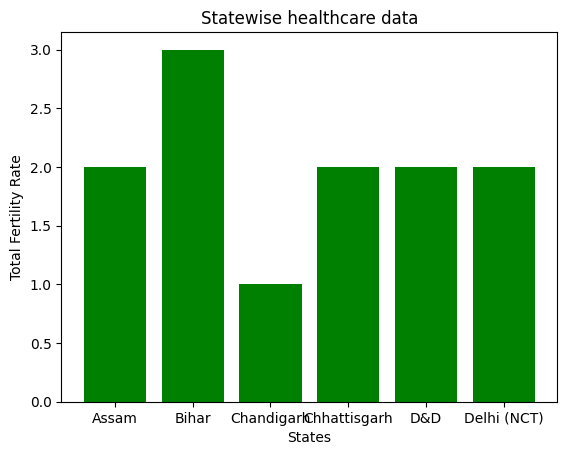

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
df1 = pd.read_csv("DM-lab.csv")

df = pd.DataFrame(df1)

X = list(df.iloc[3:9, 0])
Y = list(df.iloc[3:9, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Statewise healthcare data")
plt.xlabel("States")
plt.ylabel("Total Fertility Rate")

# Show the plot
plt.show()
